In [76]:
import numpy
import random
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import to_categorical

# Data
## Loading

In [48]:
(trainX, trainY), (testX, testY) = mnist.load_data()

In [49]:
Y_test_for_later = testY
X_test_for_later = testX

## Preparation

We put picture on a shape of $28 \times 28$ pixels and 1 color (shade of grey)

In [50]:
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

One hot encode target value

In [51]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

convert from integers to floats

In [52]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')

Normalize to range 0-1

In [53]:
train_norm = trainX / 255.0
test_norm = testX/ 255.0

# Model

## CNN creation

We create sequential model is created, which allows a linear stack of layers to be defined.\
We add a 2D convolution layer with 16 filters of size  ($5 \times 5$) and a 'relu' activation function.\
We add a pooling layer with a pooling window ($2 \times2$ ) to reduce the data dimension.\
With the Flatten() layer, we transform data into one dimension vector.\
We add a dense layer with 100 neurons with a 'relu' activation function.\
And we add the last layer : a layer with 10 neurons for each class and 'softmax' activation function

In [83]:
model = Sequential()
model.add(Conv2D(16, (5,5), activation ='relu', input_shape = (28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

Compile model

In [84]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Fit model

In [85]:
model.fit(train_norm, trainY, epochs=10, batch_size=32, validation_data=(test_norm, testY), verbose=2)

Epoch 1/10
1875/1875 - 28s - loss: 0.1884 - accuracy: 0.9418 - val_loss: 0.0656 - val_accuracy: 0.9788 - 28s/epoch - 15ms/step
Epoch 2/10
1875/1875 - 26s - loss: 0.0604 - accuracy: 0.9813 - val_loss: 0.0496 - val_accuracy: 0.9838 - 26s/epoch - 14ms/step
Epoch 3/10
1875/1875 - 24s - loss: 0.0394 - accuracy: 0.9879 - val_loss: 0.0435 - val_accuracy: 0.9855 - 24s/epoch - 13ms/step
Epoch 4/10
1875/1875 - 26s - loss: 0.0295 - accuracy: 0.9907 - val_loss: 0.0346 - val_accuracy: 0.9893 - 26s/epoch - 14ms/step
Epoch 5/10
1875/1875 - 26s - loss: 0.0230 - accuracy: 0.9927 - val_loss: 0.0418 - val_accuracy: 0.9870 - 26s/epoch - 14ms/step
Epoch 6/10
1875/1875 - 26s - loss: 0.0171 - accuracy: 0.9945 - val_loss: 0.0336 - val_accuracy: 0.9893 - 26s/epoch - 14ms/step
Epoch 7/10
1875/1875 - 25s - loss: 0.0134 - accuracy: 0.9960 - val_loss: 0.0355 - val_accuracy: 0.9895 - 25s/epoch - 14ms/step
Epoch 8/10
1875/1875 - 25s - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0381 - val_accuracy: 0.9894 - 25s/ep

# Evaluation du model

In [86]:
test_loss, test_acc = model.evaluate(test_norm, testY)
print("Accuracy on test data:", round(test_acc*100,2), "%")

313/313 [==============================] - 2s 7ms/step - loss: 0.0354 - accuracy: 0.9897
Accuracy on test data: 98.97 %


## Visualization of misclassified data

In [87]:
predictions = model.predict(test_norm)
predicted_classes = numpy.argmax(predictions, axis =1)

313/313 [==============================] - 2s 6ms/step


In [88]:
misclassified_indices = numpy.where(predicted_classes != Y_test_for_later)

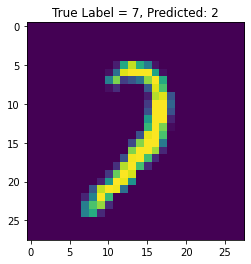

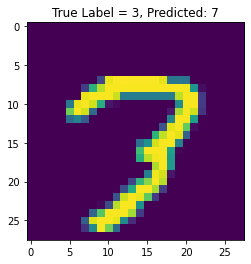

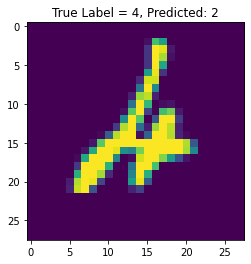

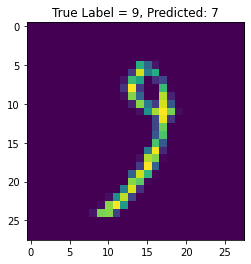

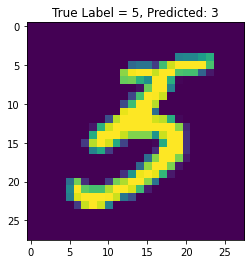

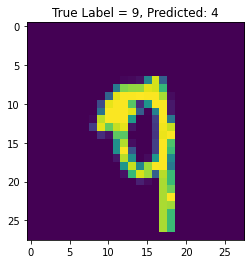

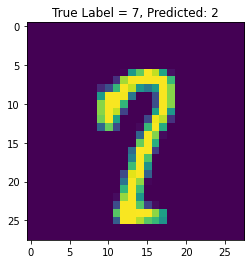

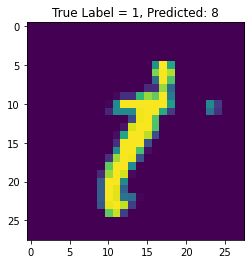

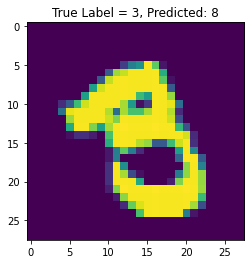

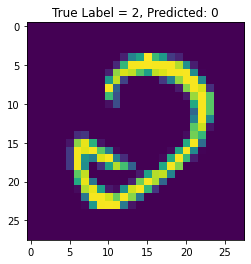

In [89]:
Picture_data  = X_test_for_later.reshape((X_test_for_later.shape[0], 28, 28, 1))
sample = random.sample(list(misclassified_indices[0]),10)
for index in sample:
    plt.imshow(Picture_data[index])
    plt.title(f"True Label = {Y_test_for_later[index]}, Predicted: {predicted_classes[index]}")
    plt.show()